## Approach using ULMFIT

In [4]:
#import the libraries
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt

In [5]:
# Connect to the google drive to access the input file
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/AIML/Projects/Capstone/"

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


## Pre-Processing

In [ ]:
df = pd.DataFrame(df_data[['Translated_ShortDesc','Translated_Description', 'Assignment group']])

In [ ]:
df['Description'] = df_data['Translated_ShortDesc'] + df_data['Translated_Description']

In [ ]:
df.drop('Translated_Description', axis = 1, inplace=True)

In [ ]:
df.head()

,Translated_ShortDesc,Assignment group,Description
0,login issue,GRP_0,login issue-verified user details.(employee# &...
1,outlook,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,cant log in to vpn,GRP_0,cant log in to vpn received from: eylqgodm....
3,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...
4,skype error,GRP_0,skype errorskype error


In [ ]:
df.drop('Translated_ShortDesc', axis = 1, inplace=True)

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


In [ ]:
df = df.replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


## Encode the Target Variable

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['label'] = le.fit_transform(df['Assignment group'])

In [ ]:
df.head()

,Assignment group,Description,label
0,GRP_0,login issue-verified user details.(employee# &...,0
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,GRP_0,cant log in to vpn received from: eylqgodm....,0
3,GRP_0,unable to access hr_tool pageunable to access ...,0
4,GRP_0,skype errorskype error,0


In [ ]:
df.drop('Assignment group', axis=1, inplace=True)

In [ ]:
df.head()

,Description,label
0,login issue-verified user details.(employee# &...,0
1,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,cant log in to vpn received from: eylqgodm....,0
3,unable to access hr_tool pageunable to access ...,0
4,skype errorskype error,0


In [ ]:
#df.drop('Description', axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Description,label
0,login issue-verified user details.(employee# &...,0
1,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,cant log in to vpn received from: eylqgodm....,0
3,unable to access hr_tool pageunable to access ...,0
4,skype errorskype error,0


In [ ]:
#df['txt_wo_stopwords'] = df['txt_wo_stopwords'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

In [ ]:
import re
df['Description'] = df['Description'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

In [ ]:
df.head()

,Description,label
0,login issueverified user detailsemployee mana...,0
1,outlook received from hmjdrvpbkomuaywngmail...,0
2,cant log in to vpn received from eylqgodmyb...,0
3,unable to access hrtool pageunable to access h...,0
4,skype errorskype error,0


In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3)
df_trn.shape, df_val.shape

((5915, 2), (2535, 2))

In [ ]:
from fastai.text import *
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## About fastai

fastai is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches.*italicized text*

Here we’ll use the method from_df of the TextLMDataBunch to create a language model specific data bunch:

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label')
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label', vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
xxbos security incidents sw in broadscanning possible vulnerability scanning we are seeing activity indicating the host at is xxunk a vulnerability scan these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability execute code or usa an attacker with unauthorized access the results of this scan could be used for future attacks or exploitation of the targeted hosts,12
xxbos security incidents in possible malware infection traffic from sinkhole domain to xxunk ip system name androidfaecee user xxunk location unknown sep sms status field sales user yes no dsw event log incident overview we are seeing your isensorcompanycom device generating vid server response with anubis sinkhole cookie set probable infected asset alerts for traffic not blocked from port tcp of to port tcp of your androidfaecee device indicating that,12
xxbos it help received from notwkdgrzvmesjptgmailcom do you have any idea why i received this message xxunk xxunk consultant xxunk from microsoft outlook sent sunday september pm to notwkdgr zvmesjpt subject undeliverable fw company ec mfgtooltion in us image removed by sender your message to dhermosigmailcom could nt be delivered xxunk could nt confirm that your message was sent from a trusted location xxunk office xxunk action required recipient spf,19
xxbos release of device received from qpixeudnrjlziysdgmailcom please release this device from quarantine from microsoft outlook sent monday august am to qpixeudn rjlziysd qpixeudnrjlziysdgmailcom subject your mobile device is temporarily blocked from synchronizing using exchange activesync until your administrator usas it access your mobile device is temporarily blocked from accessing content via exchange activesync because the mobile device has been quarantined you do nt need to take any action content,0
xxbos printer problem issue informationplease complete all required questions below if not it will be returned back to the gsc requester to provide required information gsc to review ticket if not able to resolve then please assign to appropriate group per your printer problem assignment flowchart printer name make model ex hq wy hp kd hp color laserjet pcl detailed description of the problem when i try to send a,23


## Train the model based on AWD_LSTM

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

## Learning Rate

optimal learning rate to start with:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 7.59E-02


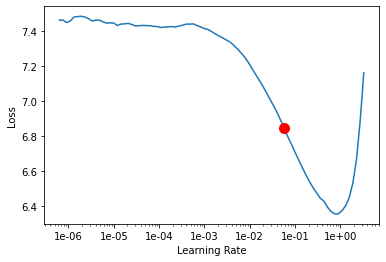

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

The above plot shows the learning rate vs loss. 

In [ ]:
min_grad_lr

0.05754399373371566

In [ ]:
learn.fit_one_cycle(2, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.883411,4.332268,0.278962,07:06
1,4.726963,3.920578,0.337377,06:55


We can now unfreeze all the layers and find the optimal learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.91E-03


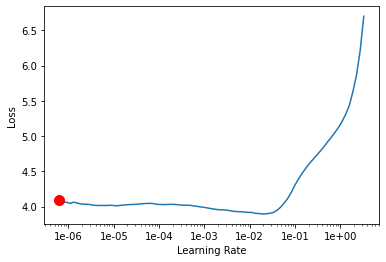

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.768101,3.466571,0.397835,10:11
1,3.434204,3.348996,0.418091,10:10


## Encoder for Classification

For classificatoin use case we just need the Encoder part. Hence we are just saving the encoder alone

In [ ]:
learn.save_encoder('ft_enc')

## Classification Model

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, metrics=[accuracy,Precision(average='weighted'),Recall(average='weighted')])
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5915 items)
x: TextList
xxbos to can not be generated received from gjtyswkbdpvaymxrgmailcom dear it the to can not be generated for below dn would you pls help to check,xxbos password resetpassword reset,xxbos job xxmaj job failed in jobscheduler at received from monitoringtoolcompanycom job xxmaj job failed in jobscheduler at,xxbos windows account lockoutwindows account lockout,xxbos printer driver updateprinter driver update
y: CategoryList
10,0,48,0,0
Path: /content/drive/MyDrive/AIML/Projects/Capstone;

Valid: LabelList (2535 items)
x: TextList
xxbos xxmaj urgent xxmaj xxunk xxmaj delivery xxmaj letter xxmaj sales xxmaj order xxmaj xxunk xxunk from xxunk hello it please urgently for help because the xxunk is already available here for picking up the onsite tools and urgently need to create a delivery xxunk make a sound thank xxunk xxunk xxmaj best,xxbos unlock account email in cell phone the user xxunk xxunk xxunk team could yo

## Hyper Parameter Tuning (Learning Rate)

epoch,train_loss,valid_loss,accuracy,precision,recall,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 3.02E-02


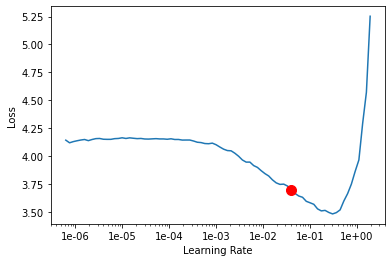

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(6, 1e-03)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,3.271720,2.359348,0.525049,nan,0.525049,07:05
1,2.408945,1.927877,0.588166,nan,0.588166,06:47
2,1.927981,1.632386,0.614201,nan,0.614201,08:28
3,1.781229,1.559178,0.611045,nan,0.611045,08:01
4,1.615388,1.527994,0.619329,nan,0.619329,07:55
5,1.561696,1.532501,0.617751,nan,0.617751,07:43


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(6, slice(1e-4/(2.6**4), 1e-4))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,1.564545,1.517890,0.621696,nan,0.621696,09:27
1,1.599285,1.507940,0.621302,nan,0.621302,09:33
2,1.500718,1.507581,0.618146,nan,0.618146,08:43
3,1.503079,1.499736,0.622880,nan,0.622880,08:52
4,1.478281,1.500505,0.620907,nan,0.620907,08:18
5,1.467328,1.489945,0.618540,nan,0.618540,09:05


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.export('/content/drive/MyDrive/AIML/Projects/Capstone/final_model.pkl')

## Train the Classification model with TOP 10 Classes

Since we have way too many classes, we could try the model performance with lesser number of classes.

Here we try to get the top 10 classes based on the row counts.

We will repeat the exact steps we tried in the first approach.

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


In [ ]:
df['Assignment group'].value_counts()

GRP_0        3976
GRP_8         661
GRP_24        289
GRP_12        257
GRP_9         252
GRP_2         241
GRP_19        215
GRP_3         200
GRP_6         184
GRP_13        145
GRP_10        140
GRP_5         129
GRP_14        118
GRP_25        116
GRP_33        107
GRP_4         100
GRP_29         97
GRP_18         88
GRP_Other      87
GRP_16         85
GRP_17         81
GRP_7          68
GRP_31         66
GRP_34         62
GRP_26         56
GRP_40         45
GRP_28         44
GRP_41         40
GRP_15         39
GRP_42         37
GRP_20         36
GRP_45         35
GRP_1          31
GRP_22         31
GRP_11         30
GRP_21         29
GRP_47         27
GRP_23         25
GRP_62         25
GRP_30         25
GRP_60         20
GRP_39         19
GRP_27         18
GRP_37         16
GRP_44         15
GRP_36         15
GRP_50         14
GRP_53         11
GRP_65         11
GRP_48          9
Name: Assignment group, dtype: int64

In [ ]:
need = df['Assignment group'].value_counts().index[:10]
df['Assignment group'] = np.where(df['Assignment group'].isin(need), df['Assignment group'], 'Misc')

## Top 10 classes based on Row Count

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
Misc      2047
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
Name: Assignment group, dtype: int64

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['label'] = le.fit_transform(df['Assignment group'])

In [ ]:
df.drop('Assignment group', axis=1, inplace=True)

In [ ]:
df.head()

,Description,label
0,login issue-verified user details.(employee# &...,0
1,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,cant log in to vpn received from: eylqgodm....,0
3,unable to access hr_tool pageunable to access ...,0
4,skype errorskype error,0


In [ ]:
import re
df['Description'] = df['Description'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

In [ ]:
df = df.replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)

In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.2)
df_trn.shape, df_val.shape

((5915, 2), (2535, 2))

In [2]:
from fastai.text import *
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label')
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label', vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
xxbos security incidents in possible malware infection traffic from sinkhole domain to androidfasource ip system name androidfaecee user xxunk location unknown sep sms status field sales user yes no dsw event log incident overview we are seeing your isensorcompanycom device generating vid server response with anubis sinkhole cookie set probable infected asset alerts for traffic not blocked from port tcp of to port tcp of your androidfaecee device indicating that,4
xxbos security incidents sw in magento sql xxunk ip system name xxunk xxunk user name na location xxunk sep sms status field sales user yes no dsw event log see below the ctoc has received at least occurrences of vid possible magento mageadminhtmlblockwidgetgridgetcsvfile sql injection attempt inbound cve alerts from your isensor device isensplantcompanycom for traffic not blocked sourcing from port tcp of dallas usa destined to port tcp of,4
xxbos symantec endpoint encryption see agent roll out europe region only sales pcs received from yqlvfkihfolbpugdgmailcom dear folks i would like to thank all the site administrators xxunk took part in this see agent xxunk uacyltoe hxgayczeing and helped us through giving the honest xxunk on the installation behavior time to time this overall helped us to complete the xxunk uacyltoe hxgayczeing and xxunk this package to the production rollout,0
xxbos it help received from notwkdgrzvmesjptgmailcom do you have any idea why i received this message xxunk xxunk consultant xxunk from microsoft outlook sent sunday september pm to notwkdgr zvmesjpt subject undeliverable fw company ec mfgtooltion in us image removed by sender your message to dhermosigmailcom could nt be delivered gmailcom could nt confirm that your message was sent from a trusted location xxunk office xxunk action required recipient spf,10
xxbos as per incsecurity incidents in suspicious msrpcmsdsnetbios activity hostnamenew from gzhapcld fdigznbk sent wednesday august am to xxunk xxunk xxunk xxunk thoyhts brthyrtiv tiyhum kuyiomar cc gdhyrts muggftyali qfrntose ivnhumzjalakrisyuhnyrtn nyrjkctu tbhkenlo ugyothfz ugrmkdhx kathght shfhyw suhtnhdyio psfshytd bhayhtrathramdnty mamilujli subject incsecurity incidents in suspicious msrpcmsdsnetbios activity hostnamenew hello amerirtcas pc support we have detected at least occurrences of your firewall attsingaporeasacompanycom dropping traffic sourcing from hostnamenew and destined,4


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.10E-01


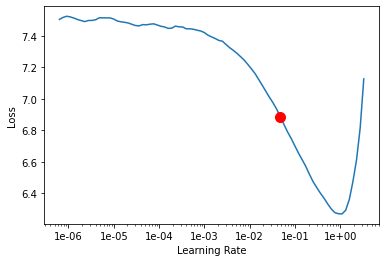

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, 2e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.480279,3.943371,0.324330,00:16
1,4.233203,3.670431,0.361473,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 1.32E-03


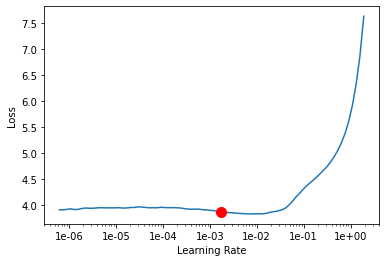

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, 2e-02)

epoch,train_loss,valid_loss,accuracy,time
0,3.682573,3.525747,0.383917,00:20
1,3.344060,3.424115,0.397656,00:20


In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, metrics=[accuracy,Precision(average='weighted'),Recall(average='weighted')])
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5915 items)
x: TextList
xxbos businessclient issue received from eqtofwbmmojfbwdsgmailcom hi it support one of our users have problem with running of businessclient client he is still getting error message that net framdntyework is not installed on your pc i tried to reinstall it but no success is it known issue please can you help us how to solve it,xxbos ticket upadate on inplantticket upadate on inplant,xxbos hostname status c is now utilizedhostname status c labelsyshostname ab is now utilized,xxbos printer issue xxunk language browsermicrosoft internet explorer emailmfeyoulindobtzpwgmailcom customer number telephone xxunk to connect a printer,xxbos i am still unable to salesperson and uacyltoe hxgaycze performed by in engineeringtoolcould you help xxunk language browsermicrosoft internet explorer xxunk customer number telephone summaryhello i am still unable to salesperson and uacyltoe hxgaycze performed by in engineeringtoolco

epoch,train_loss,valid_loss,accuracy,precision,recall,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 3.63E-02


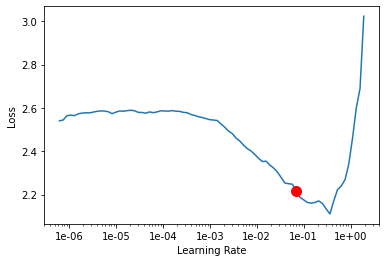

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(6, 2e-03)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,1.893735,1.440078,0.626036,nan,0.626036,00:22
1,1.393126,1.108558,0.646548,nan,0.646548,00:21
2,1.208332,0.984645,0.656805,nan,0.656805,00:23
3,1.103282,0.947799,0.656016,nan,0.656016,00:25
4,1.031301,0.949001,0.661144,nan,0.661144,00:22
5,1.008917,0.943667,0.656410,nan,0.656410,00:22


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.freeze_to(-1)
learn.fit_one_cycle(10, 2e-03)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.984936,0.928119,0.665483,0.643592,0.665483,00:24
1,0.990064,0.922979,0.667061,0.624627,0.667061,00:24
2,1.055173,0.931912,0.659566,nan,0.659566,00:22
3,1.020249,0.919247,0.669823,0.647050,0.669822,00:24
4,0.955015,0.978035,0.639053,nan,0.639053,00:23
5,0.955559,0.923125,0.657594,nan,0.657594,00:23
6,0.930776,0.919426,0.661144,nan,0.661144,00:22
7,0.902628,0.910739,0.665483,nan,0.665483,00:24
8,0.865360,0.906683,0.666272,nan,0.666272,00:23
9,0.833697,0.901938,0.667850,nan,0.667850,00:20


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(15, slice(1e-5,1e-2))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.881145,0.911822,0.683629,nan,0.683629,00:26
1,0.981766,0.991171,0.643393,nan,0.643392,00:24
2,1.026934,1.038011,0.654043,nan,0.654043,00:25
3,0.977483,0.979054,0.660355,nan,0.660355,00:25
4,0.973743,0.980711,0.643787,nan,0.643787,00:27
5,0.927406,0.990534,0.660355,nan,0.660355,00:29
6,0.874521,1.011313,0.649704,0.653983,0.649704,00:27
7,0.763251,1.061728,0.667850,0.640649,0.667850,00:26
8,0.685445,1.071800,0.661933,0.640738,0.661933,00:26
9,0.587233,1.088318,0.674951,0.667585,0.674951,00:24


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

## Observation

With Reduced number of classes (top 10), we see the performance improved from 61% to 68%

In [ ]:
learn.export('/content/drive/MyDrive/AIML/Projects/Capstone/final_model_v1.pkl')

## Predict Classes

In [6]:
learn = load_learner('/content/drive/MyDrive/AIML/Projects/Capstone/', 'final_model_v1.pkl')

In [8]:
learn.predict('Unable to Login')

(Category tensor(0),
 tensor(0),
 tensor([7.2793e-01, 1.5092e-02, 5.3060e-03, 1.2516e-03, 5.3208e-04, 3.6225e-02,
         3.3271e-04, 1.1963e-03, 9.8860e-04, 2.1579e-03, 2.0899e-01]))

As seen from the above result, the input Ticket have been classified to GRP - 0

In [7]:
learn.predict('wifi not working in pennsylvania (wireless issue at waynesboro)wifi working pennsylvania access point working . work stoppage issue. tried calling christgry twice ..reached warehouse_tool mail. left brief message. dialed again. able reach christgry')

(Category tensor(10),
 tensor(10),
 tensor([1.0092e-02, 1.3807e-04, 4.5650e-05, 4.5614e-01, 1.9921e-04, 1.1472e-04,
         3.4917e-03, 5.1060e-04, 4.5077e-03, 5.7244e-04, 5.2419e-01]))